In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/mobile_phone.csv')
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [3]:
from datetime import datetime
import time

In [4]:
#create_date -unix time FUNCTION CREATE 

In [5]:
def change_unixtime(str_date):
    timestamp =  time.mktime(datetime.strptime(str_date,'%Y-%m-%d').timetuple() )
    return timestamp

In [8]:
df['create_date'][0][:10]

'2017-03-19'

In [9]:
change_unixtime(df['create_date'][0][:10])

1489849200.0

In [11]:
df['c'] = df['create_date'].apply(lambda x :change_unixtime(x[:10]) )
df['create_date_unixtime'][:6]

0    1.489849e+09
1    1.477408e+09
2    1.477321e+09
3    1.490195e+09
4    1.460300e+09
5    1.490108e+09
Name: create_date_unixtime, dtype: float64

In [15]:
# min-max scaling  - std
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
# sklearn.preprocessing.MinMaxScaler

# (각 요소 - 평균) / (최대값 - 최소값)
df['create_unixtime_scale'] = (df['create_date_unixtime'] - df['create_date_unixtime'].min()) / \
        (df['create_date_unixtime'].max() - df['create_date_unixtime'].min())
df[['create_date','create_date_unixtime','create_unixtime_scale']].head()  


,create_date,create_date_unixtime,create_unixtime_scale
0,2017-03-19 4 35 00 PM,1.489849e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477408e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477321e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490195e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460300e+09,0.165468


In [20]:
# phone model 을 분리
df['phone_model_st'] =  df['phone_model'].apply(lambda x : x.split(" ")[-1])
df['phone_model_detail'] = df['phone_model'].apply(lambda x : ' '.join( x.split(" ")[:-1]))
df[['phone_model_st','phone_model_detail']].head()

,phone_model_st,phone_model_detail
0,64gb,iphone 6
1,32gb,galaxy s6 edge
2,32gb,galaxy s6
3,32gb,lg g5
4,32gb,lg u


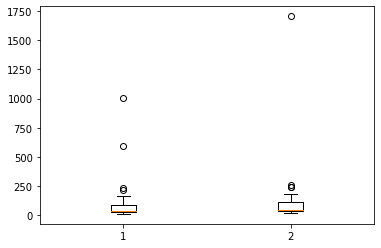

In [40]:
# 모델별 거래
model_counts =  df['phone_model'].value_counts()
model_detail_counts =  df['phone_model_detail'].value_counts()

temp = [model_counts, model_detail_counts]
# 두 피처간의 기종별 거래 데이터
import matplotlib.pyplot as plt

plt.boxplot(temp)
plt.show()

In [49]:
# 기종명+용량으로 
model_storage_factory_dic = {}

for index, row in  df.iterrows():
    model_concat =  (row['phone_model_detail'], row['phone_model_st'])
    if model_concat in model_storage_factory_dic:
        pass
    else:
        model_storage_factory_dic[model_concat] = row['factory_price']
str(model_storage_factory_dic)[:50]

"{('iphone 6', '64gb'): 924000, ('galaxy s6 edge', "

In [53]:
# z-score.....  평균으로부터 표준편차의 몇배 만큼 떨어져 있는지를 보여주는 지수
# z = (x - mean) / std
# price z score : 어떤 데이터의 가격이 해당 기종의 평균에 비해 어느정도 높거나 낮은지 알수있게
df['zscore_price'] = df.groupby('phone_model_detail')['price'].transform(lambda x: (x - x.mean()) / x.std())

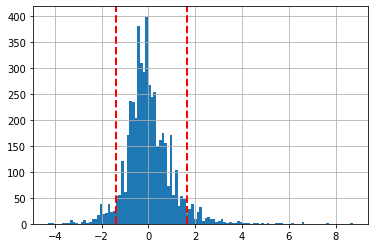

In [58]:
ax = df['zscore_price'].hist(bins='auto')
lower= df['zscore_price'].quantile(0.05)
upper = df['zscore_price'].quantile(0.95)

ax.axvline(x = lower,color = 'r', linestyle='dashed', linewidth=2)
ax.axvline(x = upper,color = 'r', linestyle='dashed', linewidth=2)

plt.show()
